In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Preprocessing data
categorical_columns = ['gender', 'smoking_status', 'ever_married', 'work_type', 'Residence_type']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Filling the columns with N/A values
data.fillna(data.mean(), inplace=True)

X = data.drop(["id", "stroke"], axis=1)
y = data["stroke"]

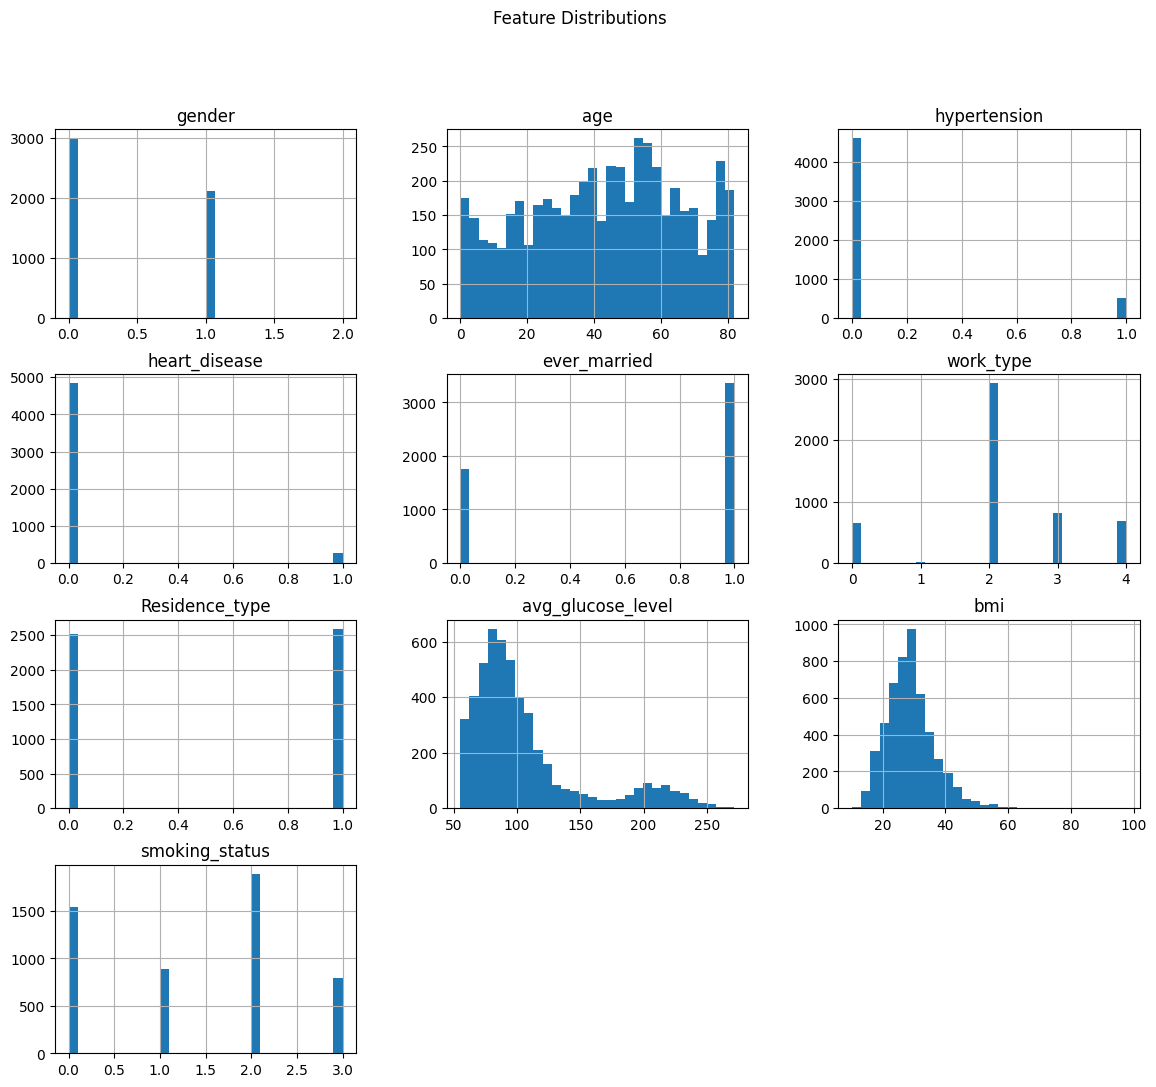

In [3]:
# Histograms of each feature
X.hist(bins=30, figsize=(14, 12))
plt.suptitle('Feature Distributions')
plt.show()

Accuracy: 0.9393346379647749


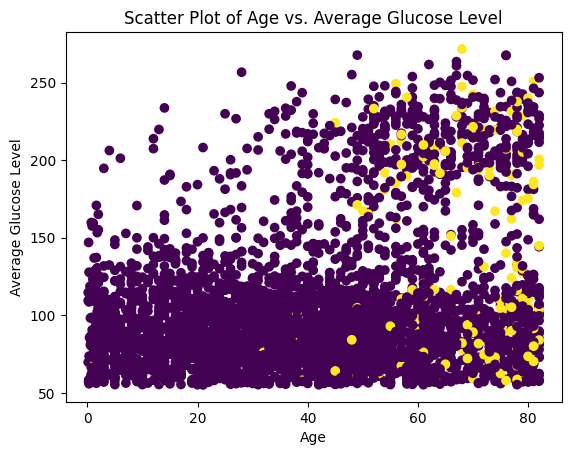

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy)
plt.scatter(X_train["age"], X_train["avg_glucose_level"], c=y_train, cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.title("Scatter Plot of Age vs. Average Glucose Level")
plt.show()

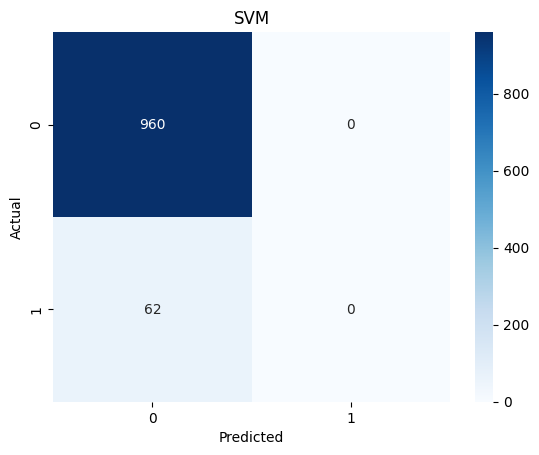

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Create a heatmap visualization
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
from sklearn.metrics import classification_report

# Create a classification report
report = classification_report(y_test, svm_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

